In [801]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()

In [1838]:
data = pd.read_csv('Data_Holland/mwl1558_C2.csv')
data.head()

,Pmin,Pmax,Pavg,Pref,Pcmin,Pcavg,Pcmax,Amin,Aavg,Amax,Ramin,Ramax,Ravg,Rain
0,-49,-49,-49.0,-49.00,-49.00,-49.00,-49.00,0.0,0.0,0.0,3.00,3.00,3.00,0
1,-49,-48,-48.5,-48.75,-48.75,-48.75,-48.75,0.0,0.0,0.0,2.75,2.75,2.75,0
2,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0
3,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0
4,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0


In [1839]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
xpts=np.array(data['Ramin'])
ypts=np.array(data['Ravg'])
zpts=np.array(data['Ramax'])

apts=np.array(data['Pmin'])
bpts=np.array(data['Pavg'])
cpts=np.array(data['Pmax'])

rpts=np.array(data['Rain'])
data1=np.vstack((xpts,ypts,zpts,apts,bpts,cpts))
print(data1.shape)
data1=data1.T

(6, 9012)


In [1840]:
num_one_targets = int(np.sum(rpts))
zero_targets_counter = 0
indices_to_remove = []
for i in range(rpts.shape[0]):
    if rpts[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
data1 = np.delete(data1, indices_to_remove, axis = 0)
rpts = np.delete(rpts, indices_to_remove, axis = 0)
data1.shape

(1734, 6)

In [1858]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(data1, rpts, test_size=0.20, shuffle=True)
X_train.shape

(1387, 6)

Text(0, 0.5, 'Maximum raw attenuation')

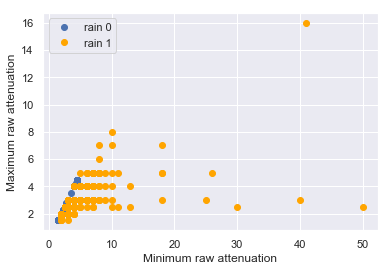

In [1859]:
# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(2):
    ax0.plot(X_train.T[0, y_train == label], X_train.T[2, y_train == label], 'o',
             color=colors[label], label='rain ' + str(label))
ax0.legend()
ax0.set_xlabel("Minimum raw attenuation")
ax0.set_ylabel("Maximum raw attenuation")
#ax0.set_title('data set')
#plt.savefig('rain_ori1.eps')

In [1860]:
# Set up the loop and plot
#fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
#alldata = np.vstack((xpts, ypts, zpts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data1, ncenters, 2, error=0.005, maxiter=1000, init=None)
    # Store fpc values for later
    fpcs.append(fpc)

In [1861]:
fpcs

[0.9992585702742938,
 0.9074892312901904,
 0.998966834527387,
 0.9082042534598324,
 1.0,
 1.0,
 0.9166666666666666,
 0.9999999999980679,
 0.9999767035205704]

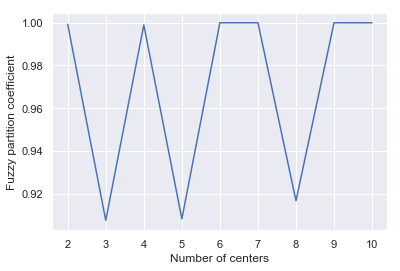

In [1862]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.savefig('fpcs.eps')

In [1873]:
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(X_train.T, 4, 2, error=0.005, maxiter=1000)

Text(0, 0.5, 'Maximum raw attenuation')

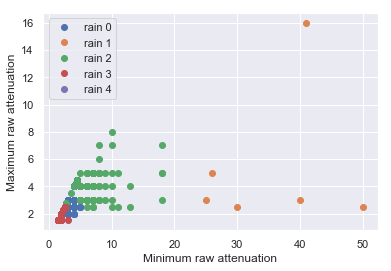

In [1874]:
# Show 3-cluster model
fig3, ax3 = plt.subplots()
ax3.set_title('') 
k=1
for j in range(5):
    ax3.plot(X_train.T[0, u_orig.argmax(axis=0) == j],
             X_train.T[2, u_orig.argmax(axis=0) == j], 'o',
             label='rain ' + str(j))
ax3.legend(loc=2)
ax3.set_xlabel("Minimum raw attenuation")
ax3.set_ylabel("Maximum raw attenuation")
#plt.savefig('cmeansr2.eps')

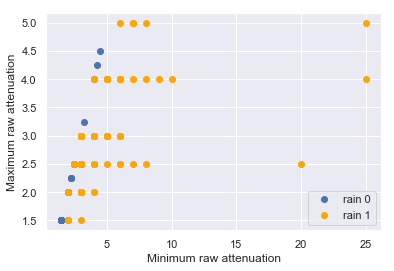

In [1875]:
fig4, ax4 = plt.subplots()
for label in range(2):
    ax4.plot(X_test.T[0, y_test == label], X_test.T[2, y_test == label], 'o',
             color=colors[label], label='rain ' + str(label))
ax4.legend()
ax4.set_xlabel("Minimum raw attenuation")
ax4.set_ylabel("Maximum raw attenuation")
plt.savefig('cmeans_test_526_KM.eps')

In [1876]:
cntr.shape

(4, 6)

In [1877]:
# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    X_test.T, cntr, 2, error=0.005, maxiter=1000)
X_test.shape

(347, 6)

In [1878]:
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

In [1478]:
#For membership inversion
for k in range(cluster_membership.size):
    if(cluster_membership[k]==0):
        cluster_membership[k]=1
    else:
        cluster_membership[k]=0
            
#cluster_membership

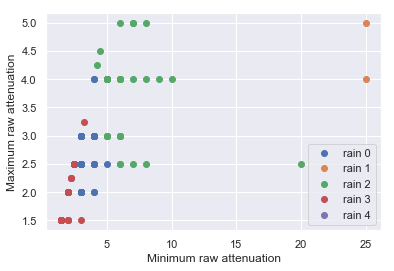

In [1879]:
fig5, ax5 = plt.subplots()
#ax5.set_title('Random points classifed according to known centers')
for j in range(5):
    ax5.plot(X_test[cluster_membership == j, 0],
             X_test[cluster_membership == j, 2], 'o',
             label='rain ' + str(j))
ax5.legend()
ax5.set_xlabel("Minimum raw attenuation")
ax5.set_ylabel("Maximum raw attenuation")
plt.savefig('cmeans_pred_526_KM.eps')

In [1854]:
#for 3 centers clustering
for k in range(cluster_membership.size):
    if(cluster_membership[k]>=2):
        cluster_membership[k]=1

In [1880]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, cluster_membership))
print(classification_report(y_test, cluster_membership))

[[ 66   0   3 105]
 [120   2  33  18]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.35      0.38      0.37       174
           1       1.00      0.01      0.02       173
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.20      0.20      0.20       347
   macro avg       0.34      0.10      0.10       347
weighted avg       0.68      0.20      0.20       347



C:\Users\Evrad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Evrad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Evrad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [1857]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, cluster_membership))

0.7780574819951988


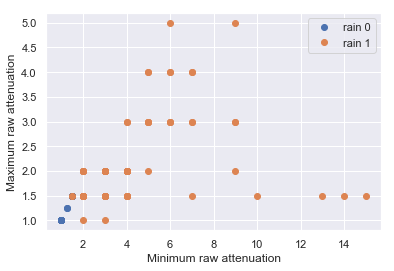

In [1708]:
fig6, ax6 = plt.subplots()
#ax5.set_title('Random points classifed according to known centers')
for j in range(2):
    ax6.plot(X_test[cluster_membership == j, 0],
             X_test[cluster_membership == j, 2], 'o',
             label='rain ' + str(j))
ax6.legend()
ax6.set_xlabel("Minimum raw attenuation")
ax6.set_ylabel("Maximum raw attenuation")
plt.savefig('cmeans_pred_526_KM2.eps')